In [1]:
%load_ext lab_black

# Model selection

This example illustrates model selection for the setting of Keane-Wolpin [(1994)](https://www.jstor.org/stable/2109768?seq=1). We show how models with different priors and models with different summary statistics can be compared.

In this example the following moduels from `respyabc` are used:

- Distance function for the descriptives:`distances.compute_mean_squared_distance`
- Get point estimate from inference: `evaluation.compute_point_estimate`
- Plot credibility intervals from inference:`evaluation.plot_credible_intervals`
- Plot posterior distribution from inference:`evaluation.plot_kernel_density_posterior`
- Simulation function of the model:`models.compute_model` 
- Inference function:`respyabc.respyabc`

We can import the necessary classes and packages by

In [23]:
import respy as rp
import numpy as np
import time

from pyabc.visualization import plot_model_probabilities
from respyabc.distances import compute_mean_squared_distance
from respyabc.models import compute_model
from respyabc.respyabc import respyabc
from respyabc.tools import convert_time

## Load data and simulate empirical data

In [3]:
params, options, data_stored = rp.get_example_model("kw_94_one")
model_to_simulate = rp.get_simulate_func(params, options)
parameter_true = {"delta_delta": 0.95}
np.random.seed(123)
pseudo_observed_data = compute_model(
    parameter_true,
    model_to_simulate=model_to_simulate,
    parameter_for_simulation=params,
    options_for_simulation=options,
    descriptives="choice_frequencies",
)

## Model selection with uniform priors

### Set pyABC settings

In [4]:
population_size = 50
max_nr_populations = 10

We need to specify a list of models we want to compare. In this example both models do only differ in their prior distribution. Model 1 is more centered around and we thus expect it to be more likely. We can specify a model selectio run by passing lists of models, prior and descriptives to the function.

In [5]:
models = [compute_model, compute_model]
parameters_prior = [
    {"delta_delta": [[0.93, 0.04], "uniform"]},
    {"delta_delta": [[0.90, 0.09], "uniform"]},
]
descriptives = ["choice_frequencies", "choice_frequencies"]

### respyabc model selection

Running the model selection is now similar to conducting inference. We just need to set the argument `model_selection=False` and pass the respective lists. 

In [6]:
np.random.seed(1234)
start_delta = time.perf_counter()
history = respyabc(
    model=models,
    parameters_prior=parameters_prior,
    data=pseudo_observed_data,
    distance_abc=compute_mean_squared_distance,
    descriptives=descriptives,
    population_size_abc=population_size,
    max_nr_populations_abc=max_nr_populations,
    minimum_epsilon_abc=0.05,
    model_selection=True,
)
end_delta = time.perf_counter()

/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warni

In [12]:
delta_time, delta_unit = convert_time(end_delta - start_delta)
f"The respyabc model selection run took {delta_time:0.2f} {delta_unit}"

'The respyabc model selection run took 12.98 minutes'

### Model selection evaluation

Computing the model probabilities can be easily done by applying pyABCs routines. To get the probabilities for each run we apply the `history` object and the `get_model_probabilities()` function.

In [8]:
model_probabilities = history.get_model_probabilities()
model_probabilities

m,0,1
t,,
0,0.294000,0.706000
1,0.659763,0.340237


Plotting the probabilities directly is also already implemented in pyABC and can be done by applying the `plot_model_probabilities()` function to the `history` object.

<AxesSubplot:title={'center':'Model probabilities'}, xlabel='Population index', ylabel='Probability'>

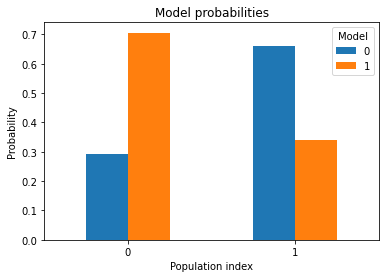

In [9]:
plot_model_probabilities(history)

## Model selection with normal priors

### Set normal priors

In [38]:
parameters_prior = [
    {"delta_delta": [[0.95, 0.02], "norm"]},
    {"delta_delta": [[0.90, 0.02], "norm"]},
]

In [39]:
np.random.seed(1234)
start_delta = time.perf_counter()
history = respyabc(
    model=models,
    parameters_prior=parameters_prior,
    data=pseudo_observed_data,
    distance_abc=compute_mean_squared_distance,
    descriptives=descriptives,
    population_size_abc=population_size,
    max_nr_populations_abc=max_nr_populations,
    minimum_epsilon_abc=0.05,
    model_selection=True,
)
end_delta = time.perf_counter()

/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warnings.warn("All seeds should be different.", category=UserWarning)
/home/manuel/anaconda3/lib/python3.7/site-packages/respy/pre_processing/model_processing.py:104: UserWarning: All seeds should be different.
  warni

In [43]:
delta_time, delta_unit = convert_time(end_delta - start_delta)
f"The respyabc model selection run took {delta_time:0.2f} {delta_unit}"

'The respyabc model selection run took 19.14 minutes'

### Model selection evaluation

In [42]:
model_probabilities = history.get_model_probabilities()
model_probabilities

m,0,1
t,,
0,0.976000,0.024000
1,0.964143,0.035857
2,0.966357,0.033643


<AxesSubplot:title={'center':'Model probabilities'}, xlabel='Population index', ylabel='Probability'>

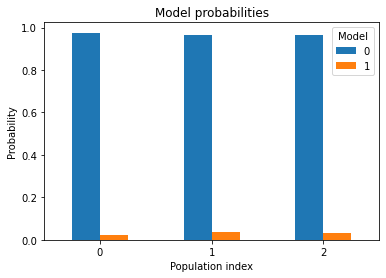

In [41]:
plot_model_probabilities(history)